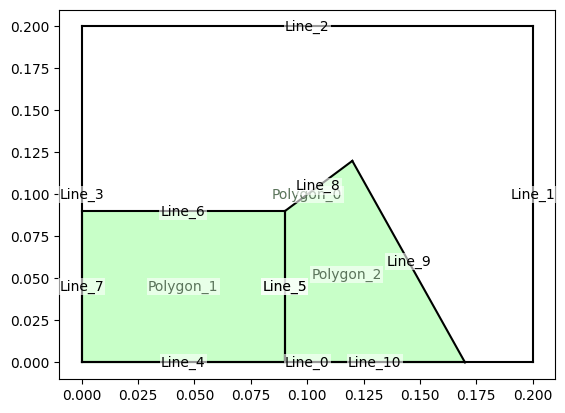

In [1]:
import matplotlib.pyplot as plt
import fluid_fvm.geometry as geo
import fluid_fvm.project as pr
import fluid_fvm.mesh as ms

a = geo.Assembly(base_polygon=geo.Polygon([geo.Point(0,0),geo.Point(0.2,0),geo.Point(0.2,0.2), geo.Point(0,0.2)]), 
                 polygon_list=[geo.Polygon([geo.Point(0,0),geo.Point(0.09,0),geo.Point(0.09,0.09), geo.Point(0,0.09)]),
                               geo.Polygon([geo.Point(0.09, 0), geo.Point(0.09,0.09),geo.Point(0.12,0.12), geo.Point(0.17,0)])])
a.assemble()
fig,ax = plt.subplots()
a.plot(ax, labels=True)
plt.show()

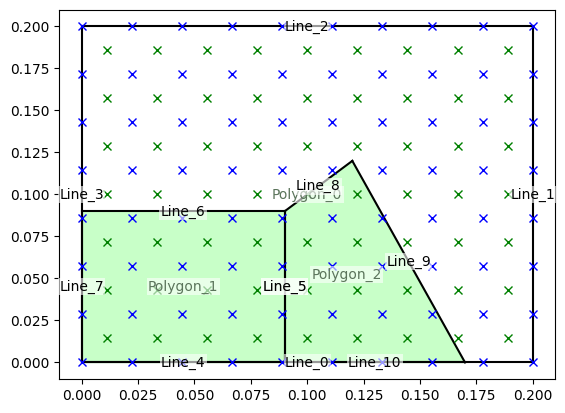

In [2]:
rec_m = ms.RectangularConfig(10,8,True)
rec_m.constructMesh(a.base_polygon)
fig,ax = plt.subplots()
a.plot(ax, labels=True)
rec_m.plotMesh(ax)
plt.show()